# ECC058 - DHLab

# Finding Web Data


#### Prof. Stephen White
#### stephen.white@unive.it

## Fetching information from the Web
There are several methods for getting data from the web.
 - Download datafiles of various formats: csv, tsv, xslx, xml, json, etc.
 - Capture response data from calling a URL to services (websites, Restful, php, asp, etcs) that returns various formats: html, xml, json, csv, text, etc.
 - With html it is often necessary to extract the data from the html using a library
 
Python includes a `urllib` module to download Web pages as raw html as seen by the browser before the browser processes it. The same as using `view source` on the context menu, only with out the pretty printing.
```Python
import urllib.request
```

In [1]:
import urllib.request
from bs4 import BeautifulSoup
import re
import pandas as pd

# base url string of site
urlBase = "https://edh-www.adw.uni-heidelberg.de"
# query parameters for the url, page size set to 100
urlQueryBase = "/inschrift/erweiterteSuche?hd_nr=&tm_nr=&beleg=c&land=&fo_antik=&fo_modern=&fundstelle=&region=&compFundjahr=eq&fundjahr=&aufbewahrung=&inschriftgattung=&sprache=L&inschrifttraeger=&compHoehe=eq&hoehe=&compBreite=eq&breite=&compTiefe=eq&tiefe=&bh=&palSchreibtechnik=&dat_tag=&dat_monat=&dat_jahr_a=&dat_jahr_e=&hist_periode=&religion=&literatur=&kommentar=&p_name=&p_praenomen=&p_nomen=&p_cognomen=&p_supernomen=&p_tribus=&p_origo=&p_geschlecht=&p_status=&compJahre=eq&p_lJahre=&compMonate=eq&p_lMonate=&compTage=eq&p_lTage=&compStunden=eq&p_lStunden=&atext1=&bool=AND&atext2=&beleg89=ja&nurMitFoto=ja&sort=hd_nr&anzahl=100&addFeldMaterial=ja&addFeldDTyp=ja&addFeldIGat=ja&start="
# offset of the query
offset = 0
# parameter to specify language as english
paramLang = "&lang=en"

url = urlBase + urlQueryBase + str(offset)
f = urllib.request.urlopen(url)
htmlDocString = f.read() 
f.close()
# take a quick look at the html separated
htmlSoup = BeautifulSoup(htmlDocString,'html.parser')
print(htmlSoup.prettify())


<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="latin epigraphy,epigraphy,inscription,database,ancient,Rome,Roman Empire,fotos,images,bibliography" name="keywords">
   <meta content="The Epigraphic Database Heidelberg contains the texts of Latin and bilingual (i.e. Latin-Greek) inscriptions of the Roman Empire." name="description">
    <meta content="Heidelberg Academy of Sciences and Humanities" name="publisher"/>
    <meta content="Frank Grieshaber" name="author"/>
    <title>
     Inscriptions: Advanced Search - Epigraphic Database Heidelberg
    </title>
    <link href="/edh-css/jquery-ui-slider-pips.css" rel="stylesheet"/>
    <link href="/edh-css/jquery.tree.css" rel="stylesheet"/>
    <link href="/edh-css/jq/jquery-ui.css" rel="stylesheet"/>
    <link href="https://code.jquery.com/ui/1.10.1/themes/base/jquery-ui.css" rel="stylesheet"/>
    <link href="https://cdnjs.cloudflare.com/


![webPage_results.png](attachment:webPage_results.png)


The results above from the query for 100 inscriptions has the following pattern

```html
<table class="treffertabelle">
 <thead>
  <tr>
   <th colspan="3" id="zwischenueberschrift">
    Number 1:
     .....
   </th>
  </tr>
 </thead>
 <tbody>
  <tr> ...
  </tr>
 </tbody>
</table>
<table class="treffertabelle">
 <thead>
  <tr>
   <th colspan="3" id="zwischenueberschrift">
    Number 2:
     .....
   </th>
  </tr>
 </thead>
 <tbody>
  <tr> ...
  </tr>
 </tbody>
</table>
.
.
.
<table class="treffertabelle">
 <thead>
  <tr>
   <th colspan="3" id="zwischenueberschrift">
    Number 100:
     .....
   </th>
  </tr>
 </thead>
 <tbody>
  <tr> ...
  </tr>
 </tbody>
</table>
```

## BeautifySoup selection

```python
#Find tags
soup.select("title")

#Find nth tag of type
soup.select("td:nth-of-type(2)")

#Find tags beneath other tags:
soup.select("body a")

#Find tags directly beneath other tags:
soup.select("head > title")

soup.select("p > a")

soup.select("p > a:nth-of-type(2)")

#Find tags by CSS class:
soup.select(".sister")

#Find tags of type with CSS class:
soup.select("a.sister")

#Find tags by ID:
soup.select("#link1")

#Find tagsof type with ID:
soup.select("a#link2")

#Find tags that match any selector from a list of selectors:
soup.select("#link1,#link2")

#Test for the existence of an attribute on a tag:
soup.select('a[href]')

#Find tags by attribute value:
soup.select('a[href="http://example.com/elsie"]')

#Find tags with attribute value beginning with:
soup.select('a[href^="http://example.com/"]')

#Find tags with attribute value ending with:
soup.select('a[href$="tillie"]')

#Find tags with attribute value containing:
soup.select('a[href*=".com/el"]')
```

In [2]:
# get a list of all resulting reffer 'table' elements of class 'treffertabelle' 
tableRefferList = htmlSoup.select('table.treffertabelle')
#print(type(tableRefferList)) #<class 'list'>
#print(len(tableRefferList))  #100

#set curTable to 3rd table scrap info for a single result while developing
#later this will just be a loop variable
curTable = tableRefferList[2]
print (curTable.prettify())

<table class="treffertabelle">
 <thead>
  <tr>
   <th colspan="3" id="zwischenueberschrift">
    Number 3:
    <a class="linkLastUpdateDetail" href="/edh/inschrift/HD000042">
     <span style="background-color: #FFFF00">
     </span>
     <span style="background-color: #FFFF00">
     </span>
     <span style="background-color: #FFFF00">
     </span>
     <span style="background-color: #FFFF00">
     </span>
     <span style="background-color: #FFFF00">
     </span>
     <span style="background-color: #FFFF00">
     </span>
     HD000042  – open detailed view...
    </a>
    <span style="font-weight:normal">
     (newer version at:
     <a href="http://www.edr-edr.it/edr_programmi/res_complex_comune.php?Bibliografia[]=HD000042" target="_blank">
      EDR
     </a>
     )
    </span>
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td width="200px">
    <a href="/edh/geographie/19001" style="background-image: none;color:#1F6B3B;padding:0;">
     <div id="map_canvas3" style="width:200px;hei

## Mapping Web presentation to the underlying Html

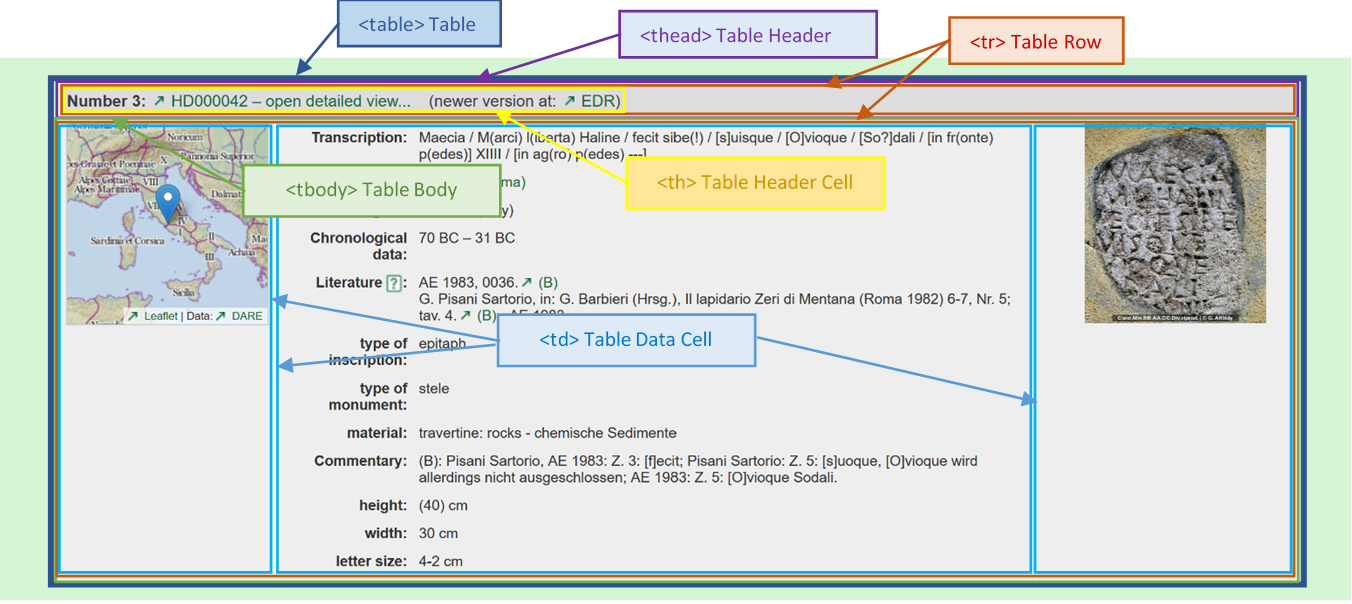



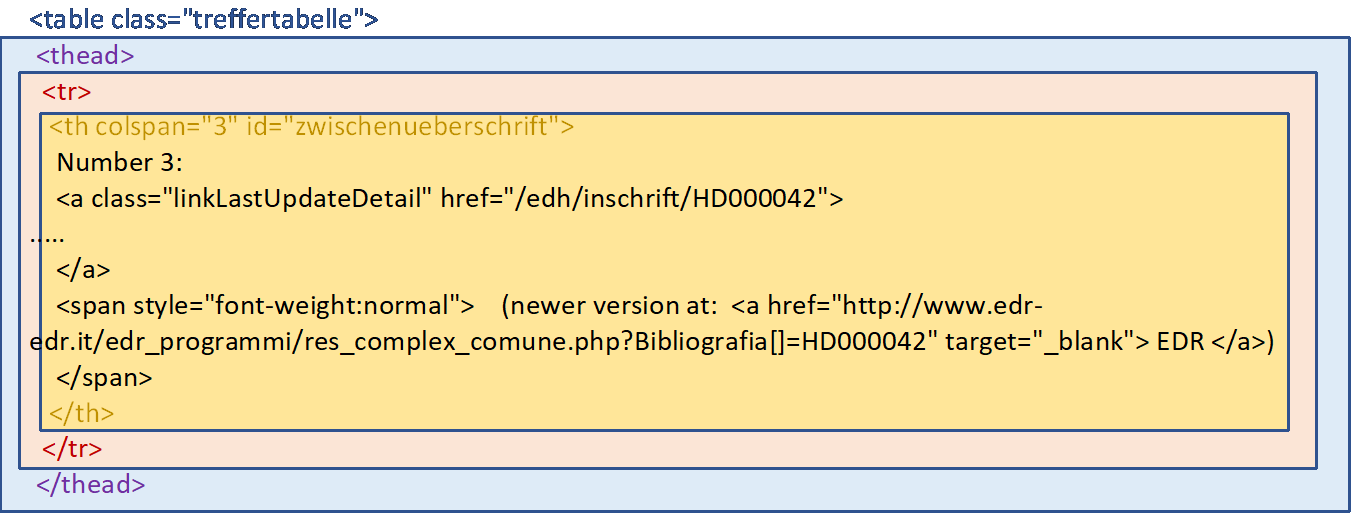


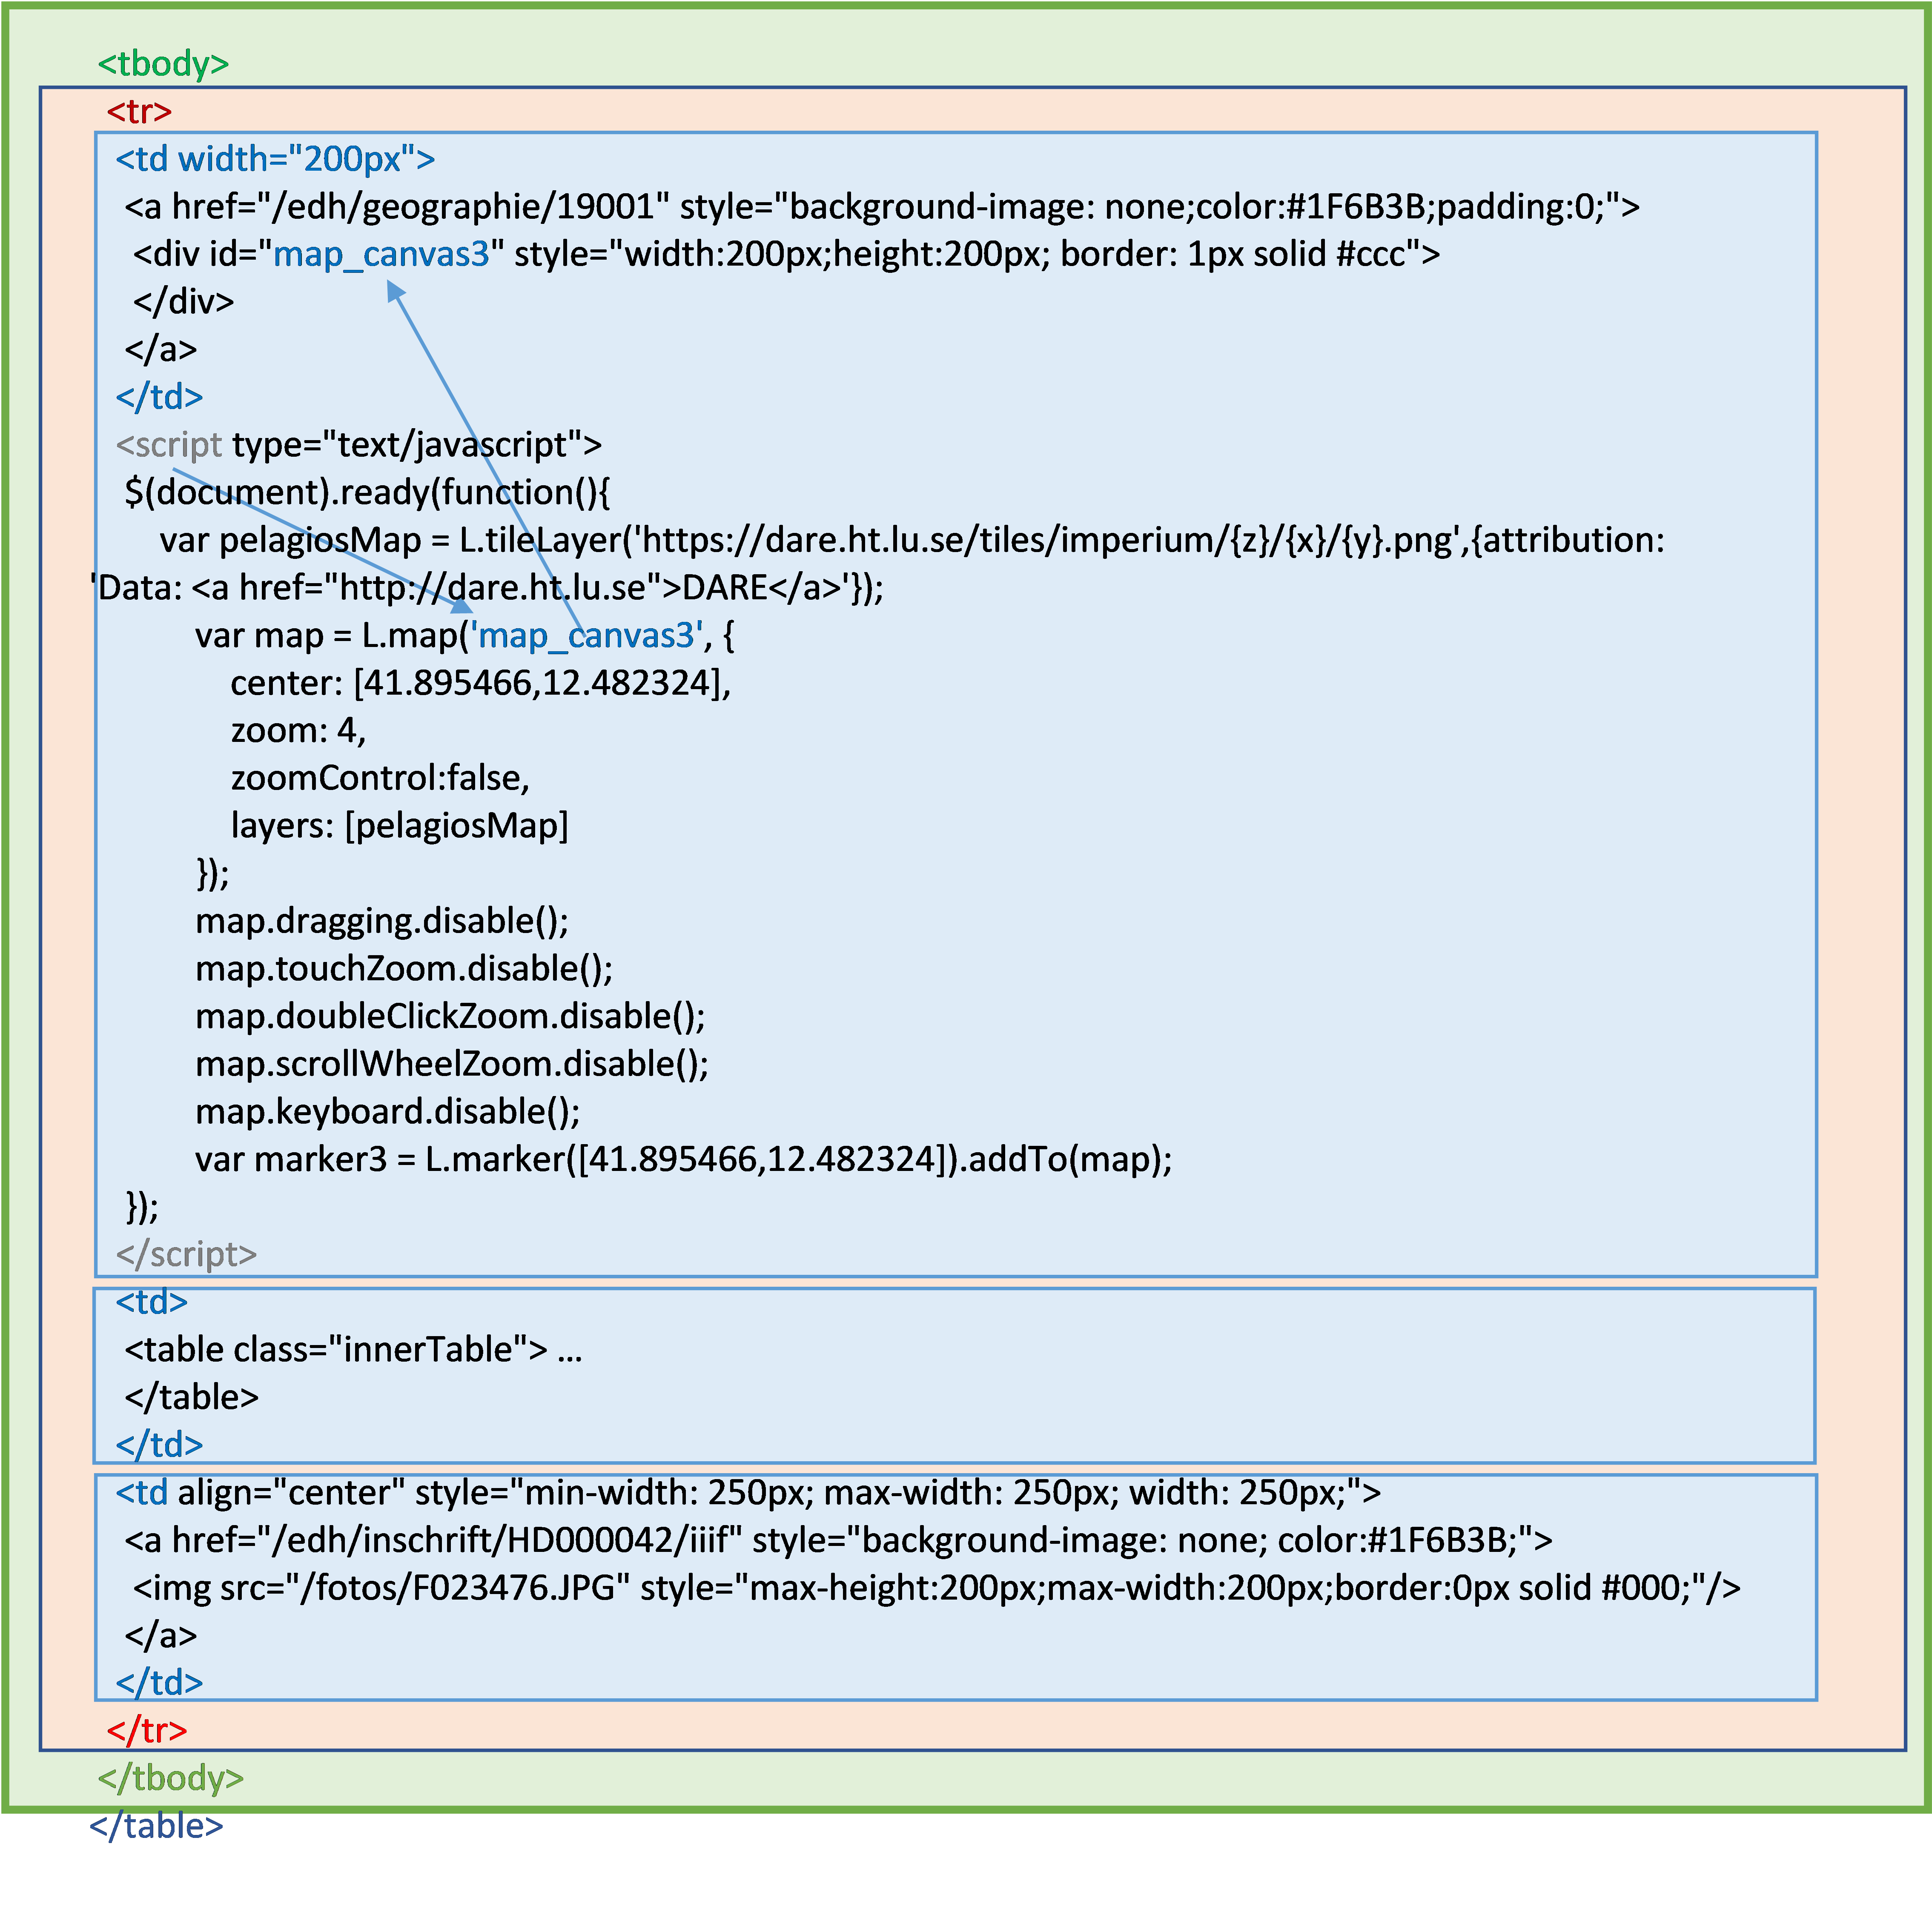


In [3]:

#get the script for the current result table
script = curTable.select('script')
#print(type(script))
#print(len(script))
codeString = script[0].string
#print(codeString)

#
coordTupleList = re.findall(r"center: \[(.+),(.+)\]",codeString)
#print(type(coordTupleList))
#print(len(coordTupleList))
#print(type(coordTupleList[0]))
#print(type(coordTupleList[0][0]))
print(coordTupleList[0])
lat = coordTupleList[0][0]
lon = coordTupleList[0][1]
print(lat,lon)

('41.895466', '12.482324')
41.895466 12.482324


In [4]:
#find link url to more detailed page
detailLinks = curTable.select('a.linkLastUpdateDetail')
urlDetail = None #set to none for no detaillinks case
for link in detailLinks:
    urlDetail = urlBase + link.get('href') + paramLang
print(urlDetail)

https://edh-www.adw.uni-heidelberg.de/edh/inschrift/HD000042&lang=en


In [ ]:
#find link url to iiif image
iiifLinksList = [a for a in curTable.select('a[href*=iiif]')]
#print(iiifLinks)
urlIIIF = None
for link in iiifLinksList:
    urlIIIF = urlBase + link.get('href')
    break
print(urlIIIF)

In [ ]:
# show any table where None means no tables in HTML. This can happen when content is dynamically loaded.
for table in soup.find_all('table'):
    print (table.prettify(),"\n")

In [ ]:
# show any table where None means no tables in HTML. This can happen when content is dynamically loaded.
# look at all the tables with of a given class attribute this web page.
for table in soup.find_all('table'):
    tclass = table.get('class')
    # filter everything but tables that have class = "treffertabelle" which refers to another webpage information table
    if tclass != None and isinstance(tclass,list) and tclass[0] == 'treffertabelle':
        print (table.prettify())

In [ ]:
# show any table where None means no tables in HTML. This can happen when content is dynamically loaded.
# look at all the tables with of a given class attribute this web page.
for table in soup.find_all('table'):
    tclass = table.get('class')
    if tclass != None and isinstance(tclass,list) and tclass[0] == 'treffertabelle':
        print (table.a.get('href'))

In [ ]:
# show any table where None means no tables in HTML. This can happen when content is dynamically loaded.
# look at all the tables with of a given class attribute this web page.

for table in soup.find_all('table'):
    tclass = table.get('class')
    if tclass != None and isinstance(tclass,list) and tclass[0] == 'treffertabelle':
        break
print (table.a.get('href'))
url1 = urlBase + table.a.get('href')
f = urllib.request.urlopen(url)
epiInfoHtmlString = f.read()
f.close()
epiSoup = BeautifulSoup(epiInfoHtmlString,'html.parser')
print(epiSoup.prettify())
 

In [ ]:
df = pd.DataFrame()


In [ ]:
import urllib.request

#url = "https://archive.4plebs.org/pol/"
url = "http://dhresourcesforprojectbuilding.pbworks.com/w/page/69244319/Digital%20Humanities%20Tools"
#urlQueryBase = "erweiterteSuche?hd_nr=&tm_nr=&beleg=c&land=&fo_antik=&fo_modern=&fundstelle=&region=&compFundjahr=eq&fundjahr=&aufbewahrung=&inschriftgattung=&sprache=L&inschrifttraeger=&compHoehe=eq&hoehe=&compBreite=eq&breite=&compTiefe=eq&tiefe=&bh=&palSchreibtechnik=&dat_tag=&dat_monat=&dat_jahr_a=&dat_jahr_e=&hist_periode=&religion=&literatur=&kommentar=&p_name=&p_praenomen=&p_nomen=&p_cognomen=&p_supernomen=&p_tribus=&p_origo=&p_geschlecht=&p_status=&compJahre=eq&p_lJahre=&compMonate=eq&p_lMonate=&compTage=eq&p_lTage=&compStunden=eq&p_lStunden=&atext1=&bool=AND&atext2=&beleg89=ja&nurMitFoto=ja&sort=hd_nr&anzahl=100&addFeldMaterial=ja&addFeldDTyp=ja&addFeldIGat=ja&start="
#offset = 0

#url = urlBase + urlQueryBase + str(offset)

f = urllib.request.urlopen(url)
str_all = f.read() 
f.close()

print(str_all)

In [ ]:
# take a quick look at the html separated
from bs4 import BeautifulSoup
myHtml = str_all # call code to get html here
soup = BeautifulSoup(myHtml,'html.parser')
print(soup.prettify())